In [48]:
import numpy as np

from gscore.fdr import GlobalDistribution

In [78]:
model_path = "/home/aaron/projects/ghost/data/spike_in/models/peptide.test"

In [79]:
global_model = GlobalDistribution.load(model_path)

In [80]:
import pandas as pd

check = pd.DataFrame(
    {
        "label": global_model.labels.ravel(),
        "scores": global_model.scores.ravel()
    }
)

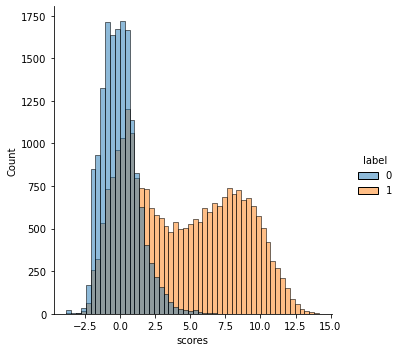

In [81]:
import seaborn as sns

sns.displot(check, x="scores", hue="label")

In [82]:
function_check = pd.DataFrame(
    {
        "label": global_model.score_distribution.x_axis.ravel(),
        "scores": global_model.score_distribution.target_scores.ravel(),
        "type": ["Target" for _ in range(global_model.score_distribution.x_axis.shape[0])]
    }

)

In [83]:
function_check

,label,scores,type
0,-2.708677,2.543303e-10,Target
1,-2.701965,3.032458e-10,Target
2,-2.695252,3.611720e-10,Target
3,-2.688540,4.296908e-10,Target
4,-2.681828,5.106472e-10,Target
...,...,...,...
995,3.970125,1.610973e-09,Target
996,3.976838,1.359230e-09,Target
997,3.983550,1.145608e-09,Target
998,3.990262,9.645336e-10,Target


In [84]:
decoy_check = pd.DataFrame(
    {
        "label": global_model.score_distribution.x_axis.ravel(),
        "scores": global_model.score_distribution.decoy_scores.ravel(),
        "type": ["Decoy" for _ in range(global_model.score_distribution.x_axis.shape[0])]
    }

)

all_scores = pd.concat(
    [
        function_check,
        decoy_check
    ]
).reset_index()

<AxesSubplot:xlabel='label', ylabel='scores'>

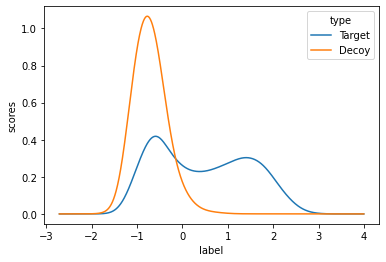

In [85]:
sns.lineplot(data=all_scores, x="label", y="scores", hue="type")

In [86]:
global_model.q_values[global_model.q_values <= 0.01]

array([0.00071521, 0.        , 0.00152745, ..., 0.00704247, 0.00559265,
       0.0061729 ])

In [76]:
global_model.q_values[global_model.q_values <= 0.01]

array([0.00090972, 0.        , 0.00260083, ..., 0.00375804, 0.00853121,
       0.00938467])